<a href="https://colab.research.google.com/github/IagoAlmeida-ias/Python-para-Data-Science/blob/main/An%C3%A1li_Preditiva02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pacotes de manipulação de Dados

import numpy as np
import pandas as pd

# Pacotes graficos

import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes da Modelagem

import statsmodels.api as sm

In [ ]:
# Importação da base de dados

df = pd.read_csv('base_funcionarios_v2.csv', delimiter=';', index_col='id')
df

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
1,5517.4,3,3
2,6399.9,4,6
3,6206.7,6,3
4,6060.6,4,5
5,6122.7,2,9
6,6955.0,5,9
7,7643.0,4,6
8,6210.2,2,8
9,5761.0,9,15


In [ ]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
1,5517.4,3,3
2,6399.9,4,6
3,6206.7,6,3
4,6060.6,4,5
5,6122.7,2,9


In [ ]:
df.tail()

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
42,5499.4,5,7
43,8521.6,8,6
44,5170.9,1,5
45,6235.4,4,6
46,11460.2,12,27


In [ ]:
df.shape

(46, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1 to 46
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
 2   Tempo_Empresa       46 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.4 KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Salario,0
Anos_Educ_Superior,0
Tempo_Empresa,0


In [ ]:
df.describe().round()

,Salario,Anos_Educ_Superior,Tempo_Empresa
count,46.0,46.0,46.0
mean,6970.0,5.0,10.0
std,1925.0,3.0,8.0
min,4140.0,0.0,0.0
25%,5818.0,4.0,5.0
50%,6395.0,5.0,8.0
75%,7972.0,6.0,17.0
max,12118.0,12.0,27.0


# Complementando - Análise Exploratória dos Dados

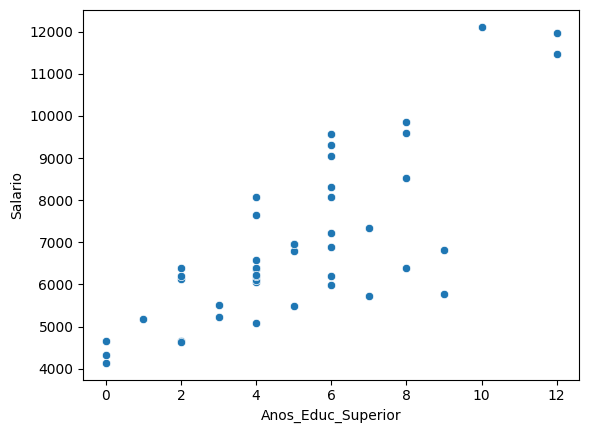

In [ ]:
# Gráfico de Dispersão por Superior

sns.scatterplot(x=df['Anos_Educ_Superior'],
                y=df['Salario']);

In [ ]:
# Correlação linear Pearsen ----- Se não retorna mais 0.6 (Está mais proxim da Relação nula)

df.corr()

,Salario,Anos_Educ_Superior,Tempo_Empresa
Salario,1.000000,0.776992,0.765173
Anos_Educ_Superior,0.776992,1.000000,0.607486
Tempo_Empresa,0.765173,0.607486,1.000000


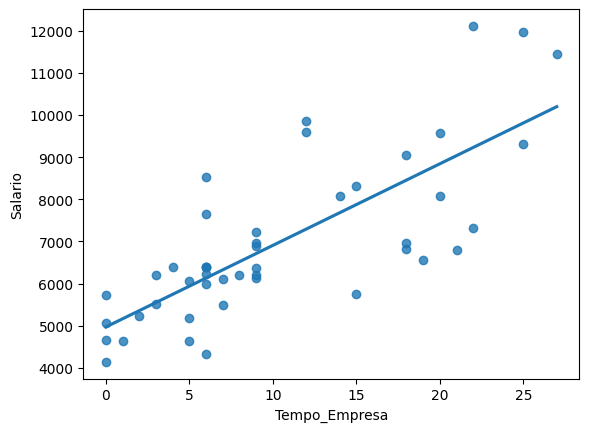

In [ ]:
# Gráfico de Dispersão por Tempo

sns.regplot(x=df['Tempo_Empresa'],
                y=df['Salario'], ci=None);

<Axes: >

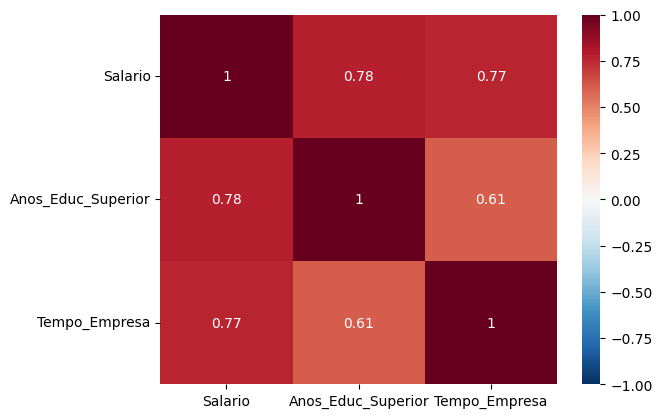

In [ ]:
# Grafico HeatMap

sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1)

In [ ]:
# Variável resposta

y = df['Salario']

# Variável explicativa
df['intercepto'] = 1
x = df[ ['intercepto','Anos_Educ_Superior', 'Tempo_Empresa'] ]

In [ ]:
# ajuste do Modelo

modelo = sm.OLS(y,x)
res = modelo.fit()

In [ ]:
# Resultado do ajuste do modelo

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.17
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.66e-13
Time:                        20:10:20   Log-Likelihood:                -381.67
No. Observations:                  46   AIC:                             769.3
Df Residuals:                      43   BIC:                             774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4056.0591    309